## Company Bankruptcy Prediction (Dimensionality Reduction)

Given financial client data, let's try to predict whether a given client will go bankrupt or not. 

We will use a variety of classification models to make our predictions.

Data Source: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

### Getting Started

In [1]:
# !pip install plotly

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
data = pd.read_csv("data.csv")
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [4]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
data.columns = [column.lstrip() for column in data.columns]
data.columns

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [7]:
{column: len(data[column].unique()) for column in data.columns}

{'Bankrupt?': 2,
 'ROA(C) before interest and depreciation before interest': 3333,
 'ROA(A) before interest and % after tax': 3151,
 'ROA(B) before interest and depreciation after tax': 3160,
 'Operating Gross Margin': 3781,
 'Realized Sales Gross Margin': 3788,
 'Operating Profit Rate': 3376,
 'Pre-tax net Interest Rate': 3789,
 'After-tax net Interest Rate': 3604,
 'Non-industry income and expenditure/revenue': 2551,
 'Continuous interest rate (after tax)': 3617,
 'Operating Expense Rate': 2966,
 'Research and development expense rate': 1536,
 'Cash flow rate': 5557,
 'Interest-bearing debt interest rate': 1080,
 'Tax rate (A)': 2488,
 'Net Value Per Share (B)': 2278,
 'Net Value Per Share (A)': 2285,
 'Net Value Per Share (C)': 2284,
 'Persistent EPS in the Last Four Seasons': 1358,
 'Cash Flow Per Share': 1545,
 'Revenue Per Share (Yuan ¥)': 3807,
 'Operating Profit Per Share (Yuan ¥)': 1236,
 'Per Share Net profit before tax (Yuan ¥)': 1522,
 'Realized Sales Gross Profit Growth Ra

### Preprocessing

In [8]:
def preprocess_inputs(df):
    df = df.copy()

    # Drop single value column
    df = df.drop('Net Income Flag', axis=1)

    # Split df into X and y
    y = df['Bankrupt?']
    X = df.drop('Bankrupt?', axis=1)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
3392,-7.065972,-7.189713,-7.577832,-0.353178,-0.352216,-27.422519,-9.852867,-9.473508,0.174600,-17.488805,-0.623336,-0.750627,-3.409234,-0.146024,-0.831378,-1.684936,-1.679626,-1.680602,-2.210939,-1.269358,-0.023643,-2.383154,-1.803000,-0.072283,-0.149416,-0.092698,-0.093621,-0.017514,-1.071132,-0.123720,-0.358472,-6.762465,-0.014476,-0.029836,-0.031652,-0.025154,-0.245936,0.245936,-0.118704,-0.292121,-0.045435,-2.398334,-1.930971,-0.554824,-1.366000,-0.04243,-0.038594,0.886224,0.736406,-0.842540,-0.020349,-0.918259,-0.039086,0.776376,1.652612,0.989620,-0.369080,-0.014476,-0.074892,0.334264,-4.717374,-0.033918,-0.090308,1.161424,0.227750,-0.066147,-0.092181,-6.779749,-0.045371,8.415101,-0.423261,-0.643034,0.806322,-0.842942,-1.475297,-0.161486,1.161424,-0.066147,-0.219187,-5.838952,-2.424303,-8.876742,-3.764293,-0.301941,-0.032383,-9.998552,4.692638,-0.014135,-0.353225,-1.832779,-0.140534,-0.046856,-0.002980,-0.193823
2755,0.405365,0.354931,0.313557,0.203699,0.200630,0.105921,0.077435,0.062927,0.047214,0.099756,-0.623336,1.316196,0.168498,-0.146024,0.987475,-0.101405,-0.100452,-0.101962,0.111816,0.190816,-0.023643,-0.097101,0.136276,-0.080535,-0.032348,0.008982,0.007273,-0.008501,0.377593,-0.034893,-0.058556,0.354458,-0.014476,-0.029836,-0.006998,-0.025154,-0.432271,0.432271,-0.119722,-0.156458,-0.017916,-0.092838,0.172557,-0.268783,-0.3

In [10]:
y_train

3392    0
2755    0
4442    0
4267    0
4912    0
       ..
905     0
5192    0
3980    0
235     1
5157    0
Name: Bankrupt?, Length: 4773, dtype: int64

### Training (Original Data)

In [11]:
original_models = {
    "Logistic Regression": LogisticRegression(),
    "K_Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in original_models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Logistic Regression trained.
K_Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Gradient Boosting trained.


In [35]:
original_results = []

for name, model in original_models.items():
    result = model.score(X_test, y_test)
    original_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

Logistic Regression: 96.48%
K_Nearest Neighbors: 96.48%
Decision Tree: 95.21%
Support Vector Machine (Linear Kernel): 96.29%
Support Vector Machine (RBF Kernel): 96.58%
Neural Network: 95.99%
Random Forest: 96.48%
Gradient Boosting: 96.14%


In [13]:
y_test.value_counts() / len(y_test)

Bankrupt?
0    0.965298
1    0.034702
Name: count, dtype: float64

### Dimensionality Reduction (PCA)

In [14]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
3392,-7.065972,-7.189713,-7.577832,-0.353178,-0.352216,-27.422519,-9.852867,-9.473508,0.174600,-17.488805,-0.623336,-0.750627,-3.409234,-0.146024,-0.831378,-1.684936,-1.679626,-1.680602,-2.210939,-1.269358,-0.023643,-2.383154,-1.803000,-0.072283,-0.149416,-0.092698,-0.093621,-0.017514,-1.071132,-0.123720,-0.358472,-6.762465,-0.014476,-0.029836,-0.031652,-0.025154,-0.245936,0.245936,-0.118704,-0.292121,-0.045435,-2.398334,-1.930971,-0.554824,-1.366000,-0.04243,-0.038594,0.886224,0.736406,-0.842540,-0.020349,-0.918259,-0.039086,0.776376,1.652612,0.989620,-0.369080,-0.014476,-0.074892,0.334264,-4.717374,-0.033918,-0.090308,1.161424,0.227750,-0.066147,-0.092181,-6.779749,-0.045371,8.415101,-0.423261,-0.643034,0.806322,-0.842942,-1.475297,-0.161486,1.161424,-0.066147,-0.219187,-5.838952,-2.424303,-8.876742,-3.764293,-0.301941,-0.032383,-9.998552,4.692638,-0.014135,-0.353225,-1.832779,-0.140534,-0.046856,-0.002980,-0.193823
2755,0.405365,0.354931,0.313557,0.203699,0.200630,0.105921,0.077435,0.062927,0.047214,0.099756,-0.623336,1.316196,0.168498,-0.146024,0.987475,-0.101405,-0.100452,-0.101962,0.111816,0.190816,-0.023643,-0.097101,0.136276,-0.080535,-0.032348,0.008982,0.007273,-0.008501,0.377593,-0.034893,-0.058556,0.354458,-0.014476,-0.029836,-0.006998,-0.025154,-0.432271,0.432271,-0.119722,-0.156458,-0.017916,-0.092838,0.172557,-0.268783,-0.3

In [15]:
X_train.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
count,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4773.000000,4.773000e+03,4.773000e+03,4773.000000,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4773.000000,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03
mean,-8.924583e-16,-2.225563e-16,-1.351713e-15,8.775344e-15,-4.463036e-15,-8.098520e-14,-1.180888e-14,2.597322e-14,-3.094203e-15,-7.75

In [22]:
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(X_train)
X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [23]:
X_train_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
3392,-21.396971,-7.427836,10.384790,-16.385044,8.410605,-14.815803,1.072838,0.033075,2.402385,-2.696531
2755,0.537250,-0.632416,-1.522062,-0.059505,-0.892918,-0.115449,-0.166554,-0.332114,-0.642663,-0.422476
4442,3.777733,-0.482875,-1.127331,-0.334114,1.277027,-0.359205,-0.872919,-0.504780,-1.627089,-1.011487
4267,-3.117700,-0.669615,-1.191915,0.644932,-1.861750,-0.650279,-0.850108,-0.755383,-0.427210,-0.891521
4912,-0.849583,0.693095,1.479401,0.479007,-0.759656,-0.081183,0.799119,0.795359,1.014490,0.554192
...,...,...,...,...,...,...,...,...,...,...
905,-0.566135,-0.528486,-0.117570,0.415036,0.398719,-0.994780,0.124759,-0.550211,-0.998750,-0.220497
5192,2.253182,3.498919,4.647433,0.692899,-0.644921,-1.188225,0.218418,0.440967,0.685758,0.521140
3980,5.630039,0.346179,0.506075,-1.037802,2.011352,-0.591237,1.471390,-2.752388,0.435182,0.486154
235,-7.567250,-0.172520,-0.267939,0.819849,-0.230117,0.908622,-2.120545,0.029506,-0.316388,0.161774


In [24]:
X_train_reduced.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
count,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03,4.773000e+03
mean,9.229761e-17,6.252419e-17,8.932027e-18,1.786405e-17,-3.721678e-17,-2.977342e-17,3.572811e-17,-8.932027e-18,-2.530741e-17,-1.488671e-17
std,3.608307e+00,2.666728e+00,2.301153e+00,2.240383e+00,2.170172e+00,1.802285e+00,1.736072e+00,1.499769e+00,1.485012e+00,1.445549e+00
min,-4.569358e+01,-4.271184e+01,-5.306129e+01,-1.242471e+02,-1.580168e+01,-5.396654e+01,-5.931159e+01,-2.596985e+01,-1.398715e+01,-2.017072e+01
25%,-1.753490e+00,-1.163244e+00,-1.325154e+00,-2.939256e-01,-1.269600e+00,-6.784001e-01,-6.907828e-01,-5.192860e-01,-6.529970e-01,-5.821846e-01
50%,-1.700214e-01,-1.948525e-01,-9.362779e-02,8.585801e-02,-3.095307e-01,3.674715e-02,4.592338e-02,-2.226302e-02,-3.950109e-02,-2.732652e-02
75%,1.700507e+00,9.014156e-01,1.271392e+00,4.503368e-01,9.136103e-01,7.179408e-01,7.511981e-01,4.891811e-01,6.050492e-01,4.992185e-01
max,3.173173e+01,9.899954e+01,2.856743e+01,3.362950e+01,4.062732e+01,2.510623e+01,1.456150e+01,4.796535e+01,5.148651e+01,4.738088e+01


In [25]:
pca.explained_variance_ratio_

array([0.13848031, 0.07563774, 0.05632122, 0.05338578, 0.05009214,
       0.0345484 , 0.03205653, 0.02392378, 0.0234553 , 0.02222527])

In [26]:
# !pip install -U kaleido

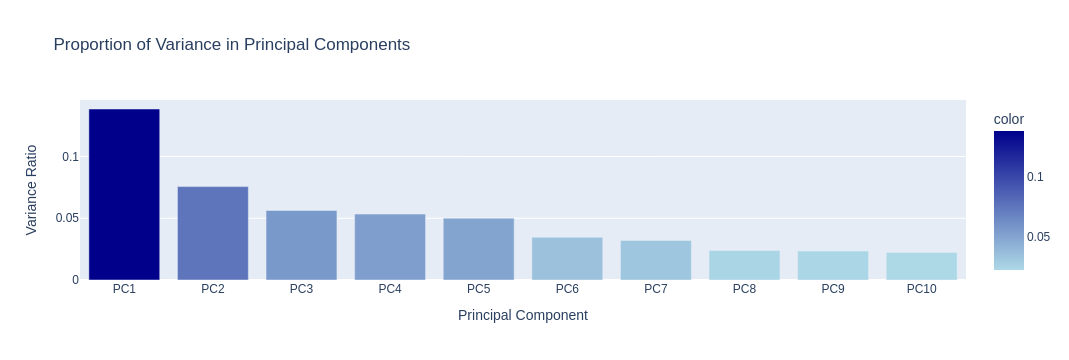

In [27]:
fig = px.bar(
    x = ["PC" + str(i) for i in range(1, n_components + 1)],
    y = pca.explained_variance_ratio_,
    labels={'x': "Principal Component", 'y': "Variance Ratio"},
    color=pca.explained_variance_ratio_,
    color_continuous_scale=[(0, 'lightblue'), (1, 'darkblue')],
    title="Proportion of Variance in Principal Components"
)
fig.show()

### Training (Reduced Data)

In [29]:
reduced_models = {
    "Logistic Regression": LogisticRegression(),
    "K_Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in reduced_models.items():
    model.fit(X_train_reduced, y_train)
    print(name + " trained.")

Logistic Regression trained.
K_Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Gradient Boosting trained.


In [36]:
reduced_results = []

for name, model in reduced_models.items():
    result = model.score(X_test_reduced, y_test)
    reduced_results.append(result)
    print(name + ": {:.2f}%".format(result * 100))

Logistic Regression: 96.24%
K_Nearest Neighbors: 96.29%
Decision Tree: 94.57%
Support Vector Machine (Linear Kernel): 96.48%
Support Vector Machine (RBF Kernel): 96.63%
Neural Network: 96.48%
Random Forest: 96.38%
Gradient Boosting: 96.43%


### Change in performance After PCA

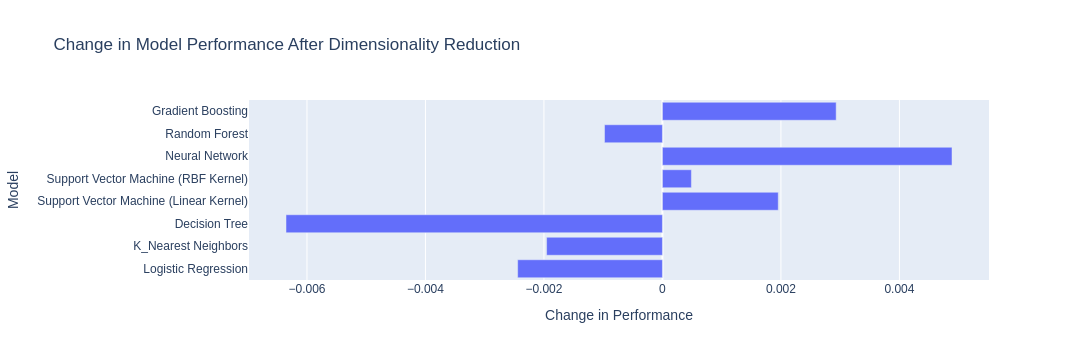

In [39]:
fig = px.bar(
    x = np.subtract(reduced_results , original_results),
    y = reduced_models.keys(),
    orientation='h',
    labels={'x': 'Change in Performance', 'y': 'Model'},
    color_continuous_scale=[(0, 'red'), (1, 'blue')],
    title = "Change in Model Performance After Dimensionality Reduction"
)
fig.show()